In [1433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1434]:
# Storing paths of all useful folders/files that will be used in the below code

folder_path = "C:/Users/91797/Downloads/cgiar-project"
test_field_ids_with_year_path = folder_path + "/test_field_ids_with_year.csv"
fields_w_additional_info_path = folder_path + "/fields_w_additional_info.csv"
train_path = folder_path + "/Train.csv"

In [1435]:
train_df = pd.read_csv(train_path)
train_df.head()

,Field_ID,Year,Quality,Yield
0,MH2O0YH,2019,3,3.686
1,O9TURWL,2019,2,5.657
2,35AFSDD,2019,3,3.082
3,PM05EG9,2019,2,2.707
4,V7PZBCG,2019,2,2.679


In [1436]:
train_df.shape


(2977, 4)

In [1437]:
train_df.isnull().sum()

Field_ID    0
Year        0
Quality     0
Yield       0
dtype: int64

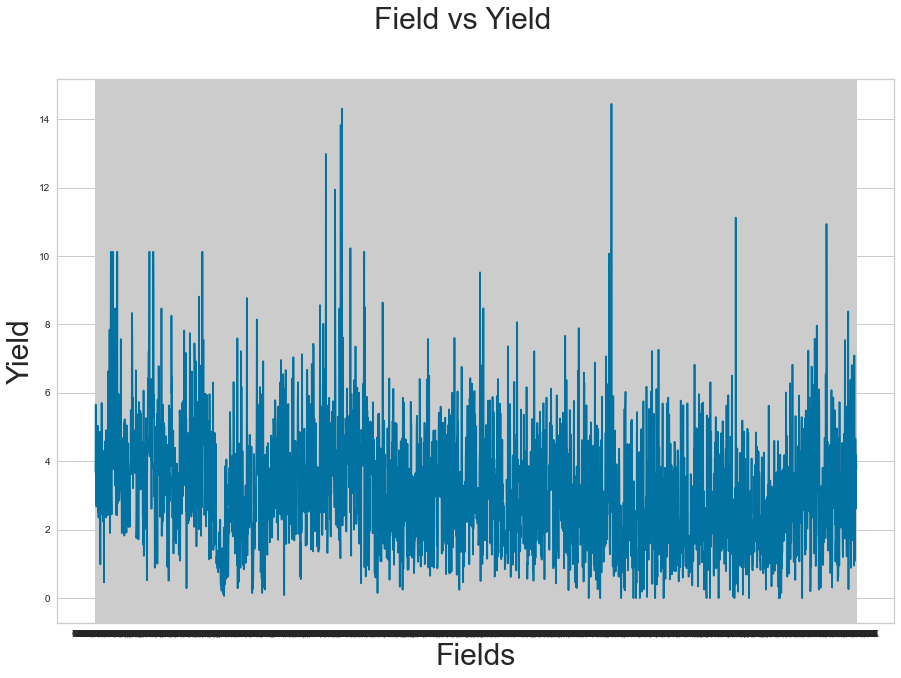

In [1438]:
#Plotting field vs yield graph. The yield data is well distributed

fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle('Field vs Yield', fontsize=30)
x = train_df['Field_ID']
y = train_df['Yield']

plt.xlabel("Fields",fontsize=30)
plt.ylabel("Yield",fontsize=30)
ax.plot(x,y)
fig.show()

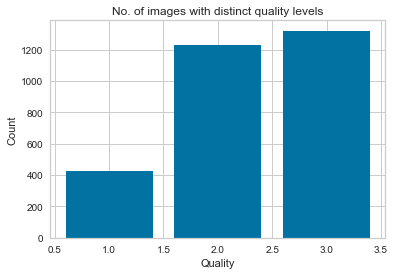

In [1439]:
#Quality=1 represents some cloudy cover in the satellite image. The count of it is very less, therefore we can directly remove it from our data.

value_counts = train_df['Quality'].value_counts()
plt.bar(value_counts.index,value_counts.values)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('No. of images with distinct quality levels')
plt.show()


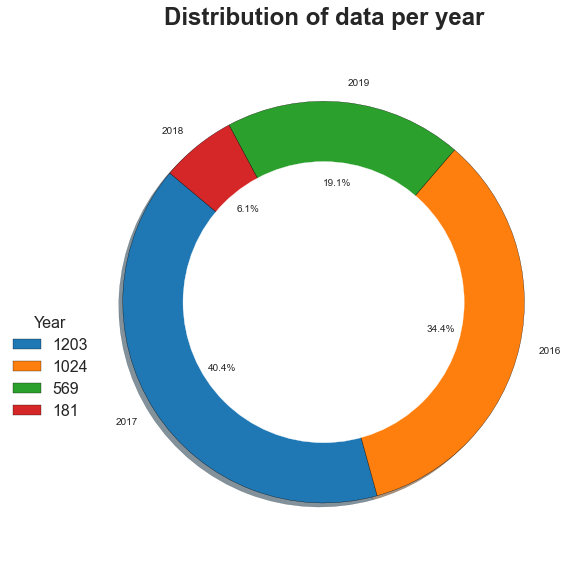

In [1440]:
value_counts = train_df['Year'].value_counts()
plt.figure(figsize=(8,8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.pie(value_counts.values,labels=value_counts.index,colors=colors,shadow=True,wedgeprops={'edgecolor':'black'},autopct="%1.1f%%",startangle=140)
plt.title('Distribution of data per year',fontsize=24,fontweight='bold',pad=20)
plt.axis('equal')
plt.legend(value_counts.values,loc='best',fontsize=14,title='Year',title_fontsize=16,bbox_to_anchor=(0/85,0.5))
plt.gca().set_aspect('equal')
plt.setp(plt.gca().get_legend().get_texts(), fontsize=16)
plt.gca().add_artist(plt.Circle((0,0),0.7,color='white'))
plt.tight_layout()
plt.show()

In [1441]:
#Number of unique fields in the dataset

value_counts = train_df['Field_ID'].value_counts()
value_counts.size


2977

In [1442]:
test_field_ids_with_year_path_df = pd.read_csv(test_field_ids_with_year_path)
test_field_ids_with_year_path_df.head()

,Field_ID,Year
0,E9UZCEA,2019
1,1WGGS1Q,2019
2,EG2KXE2,2019
3,HC3GQXF,2019
4,7AK6GFK,2019


In [1443]:
fields_w_additional_info_path_df = pd.read_csv(fields_w_additional_info_path)
fields_w_additional_info_path_df.head()

,Field_ID,soil_bdod_5-15cm_mean,soil_cec_5-15cm_mean,soil_cfvo_5-15cm_mean,soil_clay_5-15cm_mean,soil_nitrogen_5-15cm_mean,soil_ocd_5-15cm_mean,soil_ocs_0-30cm_mean,soil_phh2o_5-15cm_mean,soil_sand_5-15cm_mean,...,climate_2019_12_pr,climate_2019_12_ro,climate_2019_12_soil,climate_2019_12_srad,climate_2019_12_swe,climate_2019_12_tmmn,climate_2019_12_tmmx,climate_2019_12_vap,climate_2019_12_vpd,climate_2019_12_vs
0,MH2O0YH,118.0,257.0,85.0,463.0,2458.0,323.0,57.0,59.0,308.0,...,125.0,6.0,215.0,1880.0,0.0,100.0,267.0,1680.0,69.0,210.0
1,O9TURWL,120.0,288.0,84.0,462.0,2108.0,306.0,58.0,61.0,243.0,...,126.0,6.0,215.0,1883.0,0.0,99.0,273.0,1682.0,75.0,190.0
2,35AFSDD,120.0,263.0,102.0,495.0,1991.0,288.0,58.0,60.0,271.0,...,135.0,7.0,289.0,1875.0,0.0,100.0,274.0,1690.0,76.0,200.0
3,PM05EG9,122.0,206.0,66.0,431.0,2432.0,337.0,65.0,57.0,332.0,...,121.0,6.0,189.0,1898.0,0.0,98.0,263.0,1688.0,64.0,210.0
4,V7PZBCG,124.0,167.0,116.0,439.0,566.0,302.0,53.0,56.0,326.0,...,194.0,66.0,1214.0,1930.0,0.0,143.0,291.0,1972.0,87.0,270.0


In [1444]:
fields_w_additional_info_path_df.shape

(4032, 684)

In [1445]:
#randomly taking a field_id and checking if it is there in other file's. 

if 'E9UZCEA' in fields_w_additional_info_path_df['Field_ID'].values:
    print('yes')
else:
    print("no")

yes


In [1446]:
#Number of null values in every attribute. I observed that all null values belong to the same Field_IDs itself.

fields_w_additional_info_path_df.isnull().sum()

Field_ID                  0
soil_bdod_5-15cm_mean    37
soil_cec_5-15cm_mean     37
soil_cfvo_5-15cm_mean    37
soil_clay_5-15cm_mean    37
                         ..
climate_2019_12_tmmn     37
climate_2019_12_tmmx     37
climate_2019_12_vap      37
climate_2019_12_vpd      37
climate_2019_12_vs       37
Length: 684, dtype: int64

In [1447]:
total_rows_with_nulls = fields_w_additional_info_path_df.isnull().any(axis=1).sum()
print(f"Total number of rows with at least one null value: {total_rows_with_nulls}")


Total number of rows with at least one null value: 37


In [1448]:
fields_with_nulls = fields_w_additional_info_path_df[fields_w_additional_info_path_df.isnull().any(axis=1)]
null_field_ids = fields_with_nulls['Field_ID']

null_field_ids

37      4X1V7HB
79      IU5PSBL
80      C9643W0
85      39CHJHM
305     I6QF1AD
313     NTMK73U
967     8UO8ZAU
1001    DSD5ZKS
1028    N93HG02
1237    M1AIKYN
1241    T4J2NQF
1422    MG6BSFY
1483    CHHT0HK
1491    RYUMHZB
1504    UJ5SCPR
1505    KL2N03S
1506    VCX83EL
1507    VURK1LY
1931    XCQC656
2008    8PHDVHM
2009    YN2N8UM
2010    MYFL185
2291    9D97SSA
2359    M24BJK4
2460    QDWQ7G0
2665    10L7248
2669    7UDGL5E
2705    0CUCL1F
2744    UVUMYRN
2748    8NLV6M9
2765    QY35LG7
2883    ZNJBLGQ
3620    KMK3J5G
3622    I3A25NN
3658    90TTI7R
3841    Z2A5MP2
3941    MO48K55
Name: Field_ID, dtype: object

In [1449]:
print(train_df.shape)
print(test_field_ids_with_year_path_df.shape)

(2977, 4)
(1055, 2)


In [1450]:
#Removing the tuples with null values : removed 37 tuples

fields_w_additional_info_path_df = fields_w_additional_info_path_df.dropna()
fields_w_additional_info_path_df.shape

(3995, 684)

In [1451]:
#removing the same Field_IDs from other files as well

train_df = train_df[~train_df['Field_ID'].isin(null_field_ids)]
test_field_ids_with_year_path_df = test_field_ids_with_year_path_df[~test_field_ids_with_year_path_df['Field_ID'].isin(null_field_ids)]
print(train_df.shape)
print(test_field_ids_with_year_path_df.shape)

(2945, 4)
(1050, 2)


      climate_2016_10_vs  climate_2016_8_tmmx  climate_2019_9_vpd  \
0                  229.0                256.0                80.0   
1                  210.0                264.0                85.0   
2                  218.0                266.0                87.0   
3                  222.0                254.0                76.0   
4                  237.0                288.0               115.0   
...                  ...                  ...                 ...   
4027               222.0                262.0                92.0   
4028               238.0                285.0               113.0   
4029               243.0                288.0               112.0   
4030               258.0                290.0               119.0   
4031               246.0                289.0               116.0   

      climate_2018_3_soil  climate_2017_9_vs  
0                   234.0              184.0  
1                   244.0              172.0  
2                   238.0     

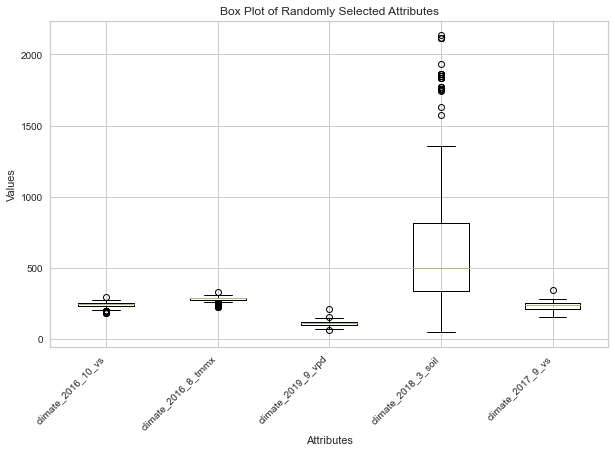

In [1452]:
#This plot randomly takes 5 attributes and plots the mean and percentile for every attribute for understanding of how scattered the numbers are for every attribute

random_attributes = fields_w_additional_info_path_df.sample(n=5, axis=1)
print(random_attributes)
attribute_names = random_attributes.columns.tolist()
print(attribute_names)
plt.figure(figsize=(10, 6))
plt.boxplot(random_attributes.values)
plt.title('Box Plot of Randomly Selected Attributes')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.xticks(range(1, 6), random_attributes.columns, rotation=45, ha='right')
plt.grid(True)
plt.grid(True)
plt.show()


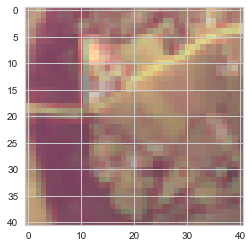

In [1453]:
#Example of Sentinel-2 satellite image as given in the dataset

image_arrays_train = folder_path + '/image_arrays_train'
train_image_file = image_arrays_train + '/OTYXP9F.npy'

arr = np.load(train_image_file)
rgb_image = np.stack((arr[4],arr[3],arr[2]),axis=-1)
rgb_image = rgb_image/np.max(rgb_image)
plt.imshow(rgb_image)

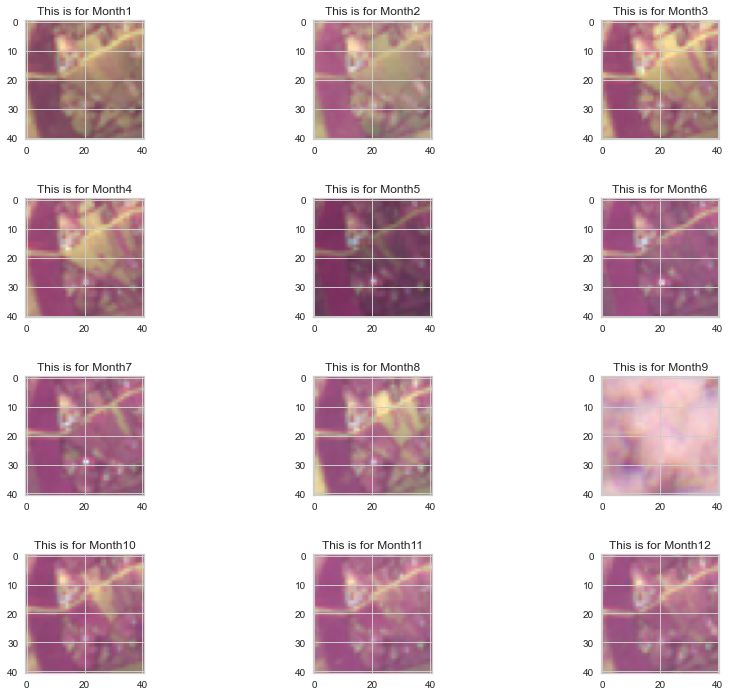

In [1454]:
#Plotting month wise satellite images for one field for all the months in a year

fig, axs = plt.subplots(4,3,figsize=(15,12))
fig.subplots_adjust(hspace=0.5, wspace=0.1)

axs=axs.ravel()

for i in range(12):
    rgb_image = np.stack([arr[i*30 + 4], arr[i*30+3], arr[i*30+2]], axis=-1)
    rgb_image = rgb_image/np.max(rgb_image)
    axs[i].imshow(rgb_image.clip(0,1))
    axs[i].set_title("This is for Month" + str(i+1))

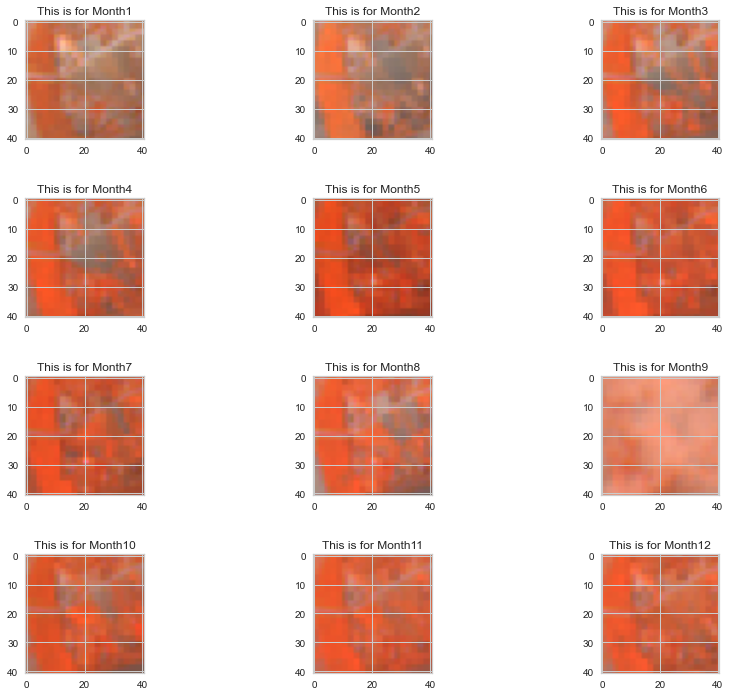

In [1455]:
#Images for the same field but using different bands (5,4,3)

fig, axs = plt.subplots(4,3,figsize=(15,12))
fig.subplots_adjust(hspace=0.5, wspace=0.1)

axs=axs.ravel()

for i in range(12):
    rgb_image = np.stack([arr[i*30 + 5], arr[i*30+4], arr[i*30+3]], axis=-1)
    rgb_image = rgb_image/np.max(rgb_image)
    axs[i].imshow(rgb_image.clip(0,1))
    axs[i].set_title("This is for Month" + str(i+1))

In [1456]:
#Removing images with quality=1

train_df_with_quality_1 = train_df[train_df['Quality']==1]['Field_ID']


train_df = train_df[train_df['Quality']!=1]

In [1457]:
##merging the soil data, weather data and the quality of images into the same dataFrame

train_df = train_df.merge(fields_w_additional_info_path_df, on='Field_ID', how='left')


In [1458]:
train_df

,Field_ID,Year,Quality,Yield,soil_bdod_5-15cm_mean,soil_cec_5-15cm_mean,soil_cfvo_5-15cm_mean,soil_clay_5-15cm_mean,soil_nitrogen_5-15cm_mean,soil_ocd_5-15cm_mean,...,climate_2019_12_pr,climate_2019_12_ro,climate_2019_12_soil,climate_2019_12_srad,climate_2019_12_swe,climate_2019_12_tmmn,climate_2019_12_tmmx,climate_2019_12_vap,climate_2019_12_vpd,climate_2019_12_vs
0,MH2O0YH,2019,3,3.686,118.0,257.0,85.0,463.0,2458.0,323.0,...,125.0,6.0,215.0,1880.0,0.0,100.0,267.0,1680.0,69.0,210.0
1,O9TURWL,2019,2,5.657,120.0,288.0,84.0,462.0,2108.0,306.0,...,126.0,6.0,215.0,1883.0,0.0,99.0,273.0,1682.0,75.0,190.0
2,35AFSDD,2019,3,3.082,120.0,263.0,102.0,495.0,1991.0,288.0,...,135.0,7.0,289.0,1875.0,0.0,100.0,274.0,1690.0,76.0,200.0
3,PM05EG9,2019,2,2.707,122.0,206.0,66.0,431.0,2432.0,337.0,...,121.0,6.0,189.0,1898.0,0.0,98.0,263.0,1688.0,64.0,210.0
4,V7PZBCG,2019,2,2.679,124.0,167.0,116.0,439.0,566.0,302.0,...,194.0,66.0,1214.0,1930.0,0.0,143.0,291.0,1972.0,87.0,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,FFX8W83,2016,3,4.662,123.0,163.0,128.0,445.0,1162.0,270.0,...,171.0,10.0,914.0,2009.0,0.0,150.0,295.0,1864.0,106.0,280.0
2533,JAOFQM9,2016,3,3.506,119.0,164.0,126.0,449.0,1631.0,306.0,...,173.0,9.0,751.0,2016.0,0.0,156.0,298.0,1909.0,109.0,280.0
2534,Z4D9MU8,2016,3,2.619,125.0,161.0,120.0,480.0,1204.0,268.0,...,177.0,10.0,969.0,2005.0,0.0,149.0,295.0,1890.0,103.0,290.0
2535,SX57GH1,2016,2,4.174,118.0,269.0,123.0,396.0,1307.0,307.0,...,152.0,8.0,507.0,1892.0,0.0,105.0,277.0,1786.0,72.0,150.0


In [1459]:
train_df.isnull().sum().sum()

0

In [1460]:
# from sklearn.model_selection import train_test_split

# X = train_df.drop('Yield', axis=1)
# Y = train_df['Yield']

# train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.1, random_state=42)

In [1461]:
# train_x.head()

In [1462]:
# print(train_x.isnull().sum().sum())
# print(test_x.isnull().sum().sum())
# print(train_y.isnull().sum().sum())
# print(test_y.isnull().sum().sum())

In [1463]:
#Checking if min and max values are the same or not. If they are same then it means that attribute is not contributing to our prediction model.

train_df_selected_columns = train_df.iloc[:, 1:]

range_of_values_train = train_df_selected_columns.describe().loc[['min', 'max']]
print(range_of_values_train)

       Year  Quality    Yield  soil_bdod_5-15cm_mean  soil_cec_5-15cm_mean  \
min  2016.0      2.0   0.0000                  102.0                  96.0   
max  2019.0      3.0  14.3125                  131.0                 345.0   

     soil_cfvo_5-15cm_mean  soil_clay_5-15cm_mean  soil_nitrogen_5-15cm_mean  \
min                   12.0                  268.0                      529.0   
max                  194.0                  654.0                     5285.0   

     soil_ocd_5-15cm_mean  soil_ocs_0-30cm_mean  ...  climate_2019_12_pr  \
min                 221.0                  38.0  ...               113.0   
max                 467.0                 110.0  ...               311.0   

     climate_2019_12_ro  climate_2019_12_soil  climate_2019_12_srad  \
min                 6.0                  42.0                1620.0   
max               164.0                2135.0                2044.0   

     climate_2019_12_swe  climate_2019_12_tmmn  climate_2019_12_tmmx  \
min      

In [1464]:
# test_x_selected_columns = test_x.iloc[:, 1:]

# range_of_values_test = test_x_selected_columns.describe().loc[['min', 'max']]
# print(range_of_values_test)

In [1465]:
#Removing attributes with min=max

stats_train = train_df_selected_columns.describe()

cols_to_remove = stats_train.columns[stats_train.loc['min'] == stats_train.loc['max']]

train_df_filtered = train_df.drop(cols_to_remove, axis=1)

In [1466]:
train_df_filtered

,Field_ID,Year,Quality,Yield,soil_bdod_5-15cm_mean,soil_cec_5-15cm_mean,soil_cfvo_5-15cm_mean,soil_clay_5-15cm_mean,soil_nitrogen_5-15cm_mean,soil_ocd_5-15cm_mean,...,climate_2019_12_pet,climate_2019_12_pr,climate_2019_12_ro,climate_2019_12_soil,climate_2019_12_srad,climate_2019_12_tmmn,climate_2019_12_tmmx,climate_2019_12_vap,climate_2019_12_vpd,climate_2019_12_vs
0,MH2O0YH,2019,3,3.686,118.0,257.0,85.0,463.0,2458.0,323.0,...,1067.0,125.0,6.0,215.0,1880.0,100.0,267.0,1680.0,69.0,210.0
1,O9TURWL,2019,2,5.657,120.0,288.0,84.0,462.0,2108.0,306.0,...,1078.0,126.0,6.0,215.0,1883.0,99.0,273.0,1682.0,75.0,190.0
2,35AFSDD,2019,3,3.082,120.0,263.0,102.0,495.0,1991.0,288.0,...,1084.0,135.0,7.0,289.0,1875.0,100.0,274.0,1690.0,76.0,200.0
3,PM05EG9,2019,2,2.707,122.0,206.0,66.0,431.0,2432.0,337.0,...,1053.0,121.0,6.0,189.0,1898.0,98.0,263.0,1688.0,64.0,210.0
4,V7PZBCG,2019,2,2.679,124.0,167.0,116.0,439.0,566.0,302.0,...,1199.0,194.0,66.0,1214.0,1930.0,143.0,291.0,1972.0,87.0,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,FFX8W83,2016,3,4.662,123.0,163.0,128.0,445.0,1162.0,270.0,...,1304.0,171.0,10.0,914.0,2009.0,150.0,295.0,1864.0,106.0,280.0
2533,JAOFQM9,2016,3,3.506,119.0,164.0,126.0,449.0,1631.0,306.0,...,1316.0,173.0,9.0,751.0,2016.0,156.0,298.0,1909.0,109.0,280.0
2534,Z4D9MU8,2016,3,2.619,125.0,161.0,120.0,480.0,1204.0,268.0,...,1299.0,177.0,10.0,969.0,2005.0,149.0,295.0,1890.0,103.0,290.0
2535,SX57GH1,2016,2,4.174,118.0,269.0,123.0,396.0,1307.0,307.0,...,1053.0,152.0,8.0,507.0,1892.0,105.0,277.0,1786.0,72.0,150.0


In [1467]:
train_df_filtered.isnull().sum().sum()

0

In [1468]:
# #Z-score normalization / Standardization
# from sklearn.preprocessing import StandardScaler

# train_first_column = train_x_filtered.iloc[:, 0]
# test_first_column = test_x_filtered.iloc[:, 0]
# print("Number of null values in train_first_column:", train_first_column.isnull().sum())
# print("Number of null values in test_first_column:", test_first_column.isnull().sum())

# train_x_selected_columns = train_x_filtered.iloc[:, 1:]
# test_x_selected_columns = test_x_filtered.iloc[:, 1:]
# print("Number of null values in train_x_selected_columns:", train_x_selected_columns.isnull().sum().sum())
# print("Number of null values in test_x_selected_columns:", test_x_selected_columns.isnull().sum().sum())

# scaler = StandardScaler()
# train_x_normalized = pd.DataFrame(scaler.fit_transform(train_x_selected_columns), columns=train_x_selected_columns.columns)
# test_x_normalized = pd.DataFrame(scaler.transform(test_x_selected_columns), columns=test_x_selected_columns.columns)

# train_x_normalized.insert(0, train_x_filtered.columns[0], train_first_column)
# test_x_normalized.insert(0, test_x_filtered.columns[0], test_first_column)

In [1469]:
# print(train_x_normalized.isnull().sum())
# print(test_x_normalized.isnull().sum().sum())

In [1470]:
folder_path

'C:/Users/91797/Downloads/cgiar-project'

In [1471]:
#Extracting the values of all the Sentinel-2 bands for all the images and storing it into a new dataframe

band_names = [l.rstrip() for l in open(folder_path + '/bandnames.txt','r').readlines()]

def extract_band(field_name, folder=folder_path + '/image_arrays_train/'):
    if pd.notnull(field_name):
        fn = folder + str(field_name) + '.npy'
        arr = np.load(fn)
        bands_required = ['S2_B1','S2_B2','S2_B3','S2_B4','S2_B5','S2_B6','S2_B7','S2_B8','S2_B8A','S2_B9','S2_B10','S2_B11','S2_B12','S2_QA10','S2_QA20','S2_QA60']
        
        values = {'Field_ID':field_name}
        for month in range(12):
            band = [str(month) + '_' + b for b in bands_required]
            find_band = np.where(np.isin(band_names,band))
            center_pixels_value = arr[find_band,25,25] # future work : image processing
            for b, n in zip(band,center_pixels_value[0]):
                values[b] = n
        
        return values
    else:
        return {}

In [1472]:
#new dataframe for both train and test satellite images

train_df_satellite_data = pd.DataFrame([extract_band(field_name) for field_name in train_df_filtered['Field_ID'].values])

In [1473]:
train_df_satellite_data

,Field_ID,0_S2_B1,0_S2_B2,0_S2_B3,0_S2_B4,0_S2_B5,0_S2_B6,0_S2_B7,0_S2_B8,0_S2_B8A,...,11_S2_B7,11_S2_B8,11_S2_B8A,11_S2_B9,11_S2_B10,11_S2_B11,11_S2_B12,11_S2_QA10,11_S2_QA20,11_S2_QA60
0,MH2O0YH,1030,848,871,870,1159,2106,2434,2443,2709,...,3644,3436,3990,893,10,1647,691,0,0,0
1,O9TURWL,1025,720,633,476,934,1700,1989,2075,2366,...,919,932,985,206,8,414,204,0,0,0
2,35AFSDD,1082,925,933,1182,1318,1648,1856,1812,2065,...,4257,3771,4633,1485,16,3570,3093,0,0,0
3,PM05EG9,970,776,719,989,951,1857,2342,2094,2620,...,6992,7110,7525,3269,31,5800,4656,0,0,1024
4,V7PZBCG,1324,1013,949,919,1455,2501,2972,2854,3374,...,3632,3401,3959,670,10,2190,1057,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,FFX8W83,1122,1001,1123,1053,1501,2526,2877,2829,3216,...,2945,2897,3241,964,16,3490,2279,0,0,0
2533,JAOFQM9,1132,934,977,794,1081,2793,3391,3123,3664,...,3060,2847,3437,926,13,2516,1429,0,0,0
2534,Z4D9MU8,1100,896,907,776,1176,2220,2607,2427,2940,...,2466,2297,2695,744,14,2591,1501,0,0,0
2535,SX57GH1,1107,833,850,792,1331,2346,2890,2743,3164,...,2670,2514,3013,840,21,2445,1633,0,0,0


In [1474]:
# test_x_satellite_data

In [1475]:
num_nan_train_x = train_df_satellite_data.isna().sum().sum()
print("Number of NaN values in train_x_satellite_data:", num_nan_train_x)

Number of NaN values in train_x_satellite_data: 0


In [1476]:
train_x_satellite_data = train_df_satellite_data.dropna(subset=['Field_ID'])
# test_x_satellite_data = test_x_satellite_data.dropna(subset=['Field_ID'])

In [1477]:
train_df_satellite_data

,Field_ID,0_S2_B1,0_S2_B2,0_S2_B3,0_S2_B4,0_S2_B5,0_S2_B6,0_S2_B7,0_S2_B8,0_S2_B8A,...,11_S2_B7,11_S2_B8,11_S2_B8A,11_S2_B9,11_S2_B10,11_S2_B11,11_S2_B12,11_S2_QA10,11_S2_QA20,11_S2_QA60
0,MH2O0YH,1030,848,871,870,1159,2106,2434,2443,2709,...,3644,3436,3990,893,10,1647,691,0,0,0
1,O9TURWL,1025,720,633,476,934,1700,1989,2075,2366,...,919,932,985,206,8,414,204,0,0,0
2,35AFSDD,1082,925,933,1182,1318,1648,1856,1812,2065,...,4257,3771,4633,1485,16,3570,3093,0,0,0
3,PM05EG9,970,776,719,989,951,1857,2342,2094,2620,...,6992,7110,7525,3269,31,5800,4656,0,0,1024
4,V7PZBCG,1324,1013,949,919,1455,2501,2972,2854,3374,...,3632,3401,3959,670,10,2190,1057,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,FFX8W83,1122,1001,1123,1053,1501,2526,2877,2829,3216,...,2945,2897,3241,964,16,3490,2279,0,0,0
2533,JAOFQM9,1132,934,977,794,1081,2793,3391,3123,3664,...,3060,2847,3437,926,13,2516,1429,0,0,0
2534,Z4D9MU8,1100,896,907,776,1176,2220,2607,2427,2940,...,2466,2297,2695,744,14,2591,1501,0,0,0
2535,SX57GH1,1107,833,850,792,1331,2346,2890,2743,3164,...,2670,2514,3013,840,21,2445,1633,0,0,0


In [1478]:
# test_x_satellite_data.isna().sum().sum()

In [1479]:
#Removing the same field_ids that we did in train_df

common_ids_train = train_df_satellite_data.index.intersection(null_field_ids)
# common_ids_test = test_x_satellite_data.index.intersection(null_field_ids)

train_x_satellite_data = train_df_satellite_data.drop(index=common_ids_train)
# test_x_satellite_data = test_x_satellite_data.drop(index=common_ids_test)

In [1480]:
train_df_satellite_data

,Field_ID,0_S2_B1,0_S2_B2,0_S2_B3,0_S2_B4,0_S2_B5,0_S2_B6,0_S2_B7,0_S2_B8,0_S2_B8A,...,11_S2_B7,11_S2_B8,11_S2_B8A,11_S2_B9,11_S2_B10,11_S2_B11,11_S2_B12,11_S2_QA10,11_S2_QA20,11_S2_QA60
0,MH2O0YH,1030,848,871,870,1159,2106,2434,2443,2709,...,3644,3436,3990,893,10,1647,691,0,0,0
1,O9TURWL,1025,720,633,476,934,1700,1989,2075,2366,...,919,932,985,206,8,414,204,0,0,0
2,35AFSDD,1082,925,933,1182,1318,1648,1856,1812,2065,...,4257,3771,4633,1485,16,3570,3093,0,0,0
3,PM05EG9,970,776,719,989,951,1857,2342,2094,2620,...,6992,7110,7525,3269,31,5800,4656,0,0,1024
4,V7PZBCG,1324,1013,949,919,1455,2501,2972,2854,3374,...,3632,3401,3959,670,10,2190,1057,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,FFX8W83,1122,1001,1123,1053,1501,2526,2877,2829,3216,...,2945,2897,3241,964,16,3490,2279,0,0,0
2533,JAOFQM9,1132,934,977,794,1081,2793,3391,3123,3664,...,3060,2847,3437,926,13,2516,1429,0,0,0
2534,Z4D9MU8,1100,896,907,776,1176,2220,2607,2427,2940,...,2466,2297,2695,744,14,2591,1501,0,0,0
2535,SX57GH1,1107,833,850,792,1331,2346,2890,2743,3164,...,2670,2514,3013,840,21,2445,1633,0,0,0


In [1481]:
#drop quality 1 images also from train and test
common_ids_train_satellite = train_df_satellite_data.index.intersection(train_df_with_quality_1)
# common_ids_test_satellite = test_x_satellite_data.index.intersection(train_df_with_quality_1)

train_df_satellite_data.drop(index=common_ids_train_satellite, inplace=True)
# test_x_satellite_data.drop(index=common_ids_test_satellite, inplace=True)

In [1482]:
train_df_satellite_data.isnull().sum().sum()

0

Calulating some Vegetation Indexes

In [1483]:
# NDVI = (NIR-Red)/(NIR+Red) = (B8-B4)/(B8+B4)
for i in range(12):
    train_df_satellite_data['NDVI_Month_' + str(i)] = (train_df_satellite_data[str(i)+'_S2_B8'] - train_df_satellite_data[str(i) + '_S2_B4']) / (train_df_satellite_data[str(i)+'_S2_B8'] + train_df_satellite_data[str(i)+'_S2_B4'])
    # test_x_satellite_data['NDVI_Month_' + str(i)] = (test_x_satellite_data[str(i)+'_S2_B8'] - test_x_satellite_data[str(i) + '_S2_B4']) / (test_x_satellite_data[str(i)+'_S2_B8'] + test_x_satellite_data[str(i)+'_S2_B4'])

In [1484]:
train_df_satellite_data

,Field_ID,0_S2_B1,0_S2_B2,0_S2_B3,0_S2_B4,0_S2_B5,0_S2_B6,0_S2_B7,0_S2_B8,0_S2_B8A,...,NDVI_Month_2,NDVI_Month_3,NDVI_Month_4,NDVI_Month_5,NDVI_Month_6,NDVI_Month_7,NDVI_Month_8,NDVI_Month_9,NDVI_Month_10,NDVI_Month_11
0,MH2O0YH,1030,848,871,870,1159,2106,2434,2443,2709,...,0.243243,0.158195,0.171176,0.040396,0.437946,0.232159,0.675852,0.702272,0.679809,0.737987
1,O9TURWL,1025,720,633,476,934,1700,1989,2075,2366,...,0.408431,0.121984,0.380672,0.501168,0.738400,0.662480,0.693479,0.639930,0.630279,0.510535
2,35AFSDD,1082,925,933,1182,1318,1648,1856,1812,2065,...,0.190198,0.171803,0.176244,0.015403,0.792242,0.682179,0.594247,0.546156,0.642398,0.181391
3,PM05EG9,970,776,719,989,951,1857,2342,2094,2620,...,0.295538,0.342577,0.419393,0.514976,0.371130,0.082803,0.556573,0.449616,0.453592,0.094267
4,V7PZBCG,1324,1013,949,919,1455,2501,2972,2854,3374,...,0.443571,0.468049,0.724788,0.652812,0.707986,0.625656,0.678304,0.697470,0.674253,0.627662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,FFX8W83,1122,1001,1123,1053,1501,2526,2877,2829,3216,...,0.223587,0.339930,0.327175,0.502843,0.385212,0.433731,0.355086,0.371532,0.359886,0.329204
2533,JAOFQM9,1132,934,977,794,1081,2793,3391,3123,3664,...,0.048546,0.717820,0.748853,0.715855,0.569620,0.651365,0.520353,0.541362,0.547525,0.395246
2534,Z4D9MU8,1100,896,907,776,1176,2220,2607,2427,2940,...,0.010152,0.401957,0.768181,0.774044,0.579286,0.487448,0.303266,0.213074,0.492879,0.396353
2535,SX57GH1,1107,833,850,792,1331,2346,2890,2743,3164,...,0.357342,0.328591,0.687861,0.679932,0.613011,0.656307,0.628536,0.541622,0.626412,0.558104


In [1485]:
# EVI = 2.5 * (NIR-Red)/(NIR + 6*Red - 7.5*Blue + 1) = 2.5*(B8-B4)(B8 + (6*B4) - (7.5*B2)+1)
for i in range(12):
    train_df_satellite_data['EVI_Month_' + str(i)] = 2.5*(train_df_satellite_data[str(i)+'_S2_B8'] - train_df_satellite_data[str(i) + '_S2_B4']) / (train_df_satellite_data[str(i)+'_S2_B8'] + (6*train_df_satellite_data[str(i)+'_S2_B4']) - (7*train_x_satellite_data[str(i)+'_S2_B2']) + 1.0)
    # test_x_satellite_data['EVI_Month_' + str(i)] = 2.5*(test_x_satellite_data[str(i)+'_S2_B8'] - test_x_satellite_data[str(i) + '_S2_B4']) / (test_x_satellite_data[str(i)+'_S2_B8'] + (6*test_x_satellite_data[str(i)+'_S2_B4']) - (7*test_x_satellite_data[str(i)+'_S2_B2']) + 1.0)

In [1486]:
# NDWI = (NIR-SWIR)/(NIR+SWIR) = (B8-B12)/(B8+B12)

for i in range(12):
    train_df_satellite_data['NDWI_Month_' + str(i)] = (train_df_satellite_data[str(i)+'_S2_B8'] - train_df_satellite_data[str(i) + '_S2_B12']) / (train_df_satellite_data[str(i)+'_S2_B8'] + (train_df_satellite_data[str(i)+'_S2_B12']))
    # test_x_satellite_data['NDWI_Month_' + str(i)] = (test_x_satellite_data[str(i)+'_S2_B8'] - test_x_satellite_data[str(i) + '_S2_B12']) / (test_x_satellite_data[str(i)+'_S2_B8'] + (test_x_satellite_data[str(i)+'_S2_B12']))


In [1487]:
# CCCI = ((NIR-RedEdge)/(NIR+RedEdge))/NDVI = ((B8-B5)/(B8+B5))/NDVI

for i in range(12):
    train_df_satellite_data['CCCI_Month_' + str(i)] = ((train_df_satellite_data[str(i)+'_S2_B8'] - train_df_satellite_data[str(i) + '_S2_B5']) / (train_df_satellite_data[str(i)+'_S2_B8'] + (train_df_satellite_data[str(i)+'_S2_B5'])))/train_df_satellite_data['NDVI_Month_'+str(i)]
    # test_x_satellite_data['CCCI_Month_' + str(i)] = ((test_x_satellite_data[str(i)+'_S2_B8'] - test_x_satellite_data[str(i) + '_S2_B5']) / (test_x_satellite_data[str(i)+'_S2_B8'] + (test_x_satellite_data[str(i)+'_S2_B5'])))/test_x_satellite_data['NDVI_Month_'+str(i)]

In [1488]:
train_df_satellite_data

,Field_ID,0_S2_B1,0_S2_B2,0_S2_B3,0_S2_B4,0_S2_B5,0_S2_B6,0_S2_B7,0_S2_B8,0_S2_B8A,...,CCCI_Month_2,CCCI_Month_3,CCCI_Month_4,CCCI_Month_5,CCCI_Month_6,CCCI_Month_7,CCCI_Month_8,CCCI_Month_9,CCCI_Month_10,CCCI_Month_11
0,MH2O0YH,1030,848,871,870,1159,2106,2434,2443,2709,...,0.844511,0.854517,0.987947,0.955546,0.820665,1.050823,0.725961,0.732641,0.727707,0.733751
1,O9TURWL,1025,720,633,476,934,1700,1989,2075,2366,...,0.547856,0.878185,0.657557,0.837267,0.784943,0.713611,0.626783,0.647062,0.681649,0.798878
2,35AFSDD,1082,925,933,1182,1318,1648,1856,1812,2065,...,0.784948,0.646734,0.796437,0.938845,0.844413,0.769715,0.639072,0.644599,0.643901,1.029721
3,PM05EG9,970,776,719,989,951,1857,2342,2094,2620,...,1.153625,0.828947,0.849924,0.838803,0.938214,0.554967,0.846210,0.975451,0.992456,0.863174
4,V7PZBCG,1324,1013,949,919,1455,2501,2972,2854,3374,...,0.618883,0.671786,0.757597,0.762524,0.790592,0.733505,0.663354,0.717858,0.726723,0.753990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,FFX8W83,1122,1001,1123,1053,1501,2526,2877,2829,3216,...,0.783682,0.716276,0.750867,0.656493,0.670791,0.766222,0.639354,0.658526,0.754456,0.780164
2533,JAOFQM9,1132,934,977,794,1081,2793,3391,3123,3664,...,0.293692,0.742687,0.750195,0.747297,0.716075,0.723703,0.768434,0.703079,0.769929,0.878072
2534,Z4D9MU8,1100,896,907,776,1176,2220,2607,2427,2940,...,-2.462919,0.761994,0.834597,0.848120,0.749190,0.678288,0.720865,0.692753,0.758685,0.727328
2535,SX57GH1,1107,833,850,792,1331,2346,2890,2743,3164,...,0.675375,0.646289,0.689638,0.693619,0.691348,0.629913,0.589524,0.623518,0.628258,0.594729


In [1489]:
# GNDVI = (NIR-Green)/(NIR+Green) = (B8-B3)/(B8+B3)
for i in range(12):
    train_df_satellite_data['GNDVI_Month_' + str(i)] = (train_df_satellite_data[str(i)+'_S2_B8'] - train_df_satellite_data[str(i) + '_S2_B3']) / (train_df_satellite_data[str(i)+'_S2_B8'] + train_df_satellite_data[str(i)+'_S2_B3'])
    # test_x_satellite_data['GNDVI_Month_' + str(i)] = (test_x_satellite_data[str(i)+'_S2_B8'] - test_x_satellite_data[str(i) + '_S2_B3']) / (test_x_satellite_data[str(i)+'_S2_B8'] + test_x_satellite_data[str(i)+'_S2_B3'])

In [1490]:
# PSRI = (B4-B2)/B6

for i in range(12):
    train_df_satellite_data['PSRI_Month_' + str(i)] = (train_df_satellite_data[str(i)+'_S2_B4'] - train_df_satellite_data[str(i) + '_S2_B2']) / (train_df_satellite_data[str(i)+'_S2_B6'])
    # test_x_satellite_data['PSRI_Month_' + str(i)] = (test_x_satellite_data[str(i)+'_S2_B4'] - test_x_satellite_data[str(i) + '_S2_B2']) / (test_x_satellite_data[str(i)+'_S2_B6'])

In [1491]:
# test_x_satellite_data

In [1492]:
# test_x_satellite_data.isnull().sum().sum()

In [1493]:
selected_columns = train_df_satellite_data.loc[:, 'NDVI_Month_0':'PSRI_Month_11']
train_df_merged = pd.concat([train_df_filtered, selected_columns], axis=1)

In [1494]:
# selected_columns = test_x_satellite_data.loc[:, 'NDVI_Month_0':'PSRI_Month_11']
# test_x_normalized = pd.concat([test_x_normalized,selected_columns],axis=1)

In [1495]:
# train_x = train_x_normalized
# test_x = test_x_normalized

In [1496]:
train_df_merged.isnull().sum().sum()

0

In [1497]:
train_df_merged

,Field_ID,Year,Quality,Yield,soil_bdod_5-15cm_mean,soil_cec_5-15cm_mean,soil_cfvo_5-15cm_mean,soil_clay_5-15cm_mean,soil_nitrogen_5-15cm_mean,soil_ocd_5-15cm_mean,...,PSRI_Month_2,PSRI_Month_3,PSRI_Month_4,PSRI_Month_5,PSRI_Month_6,PSRI_Month_7,PSRI_Month_8,PSRI_Month_9,PSRI_Month_10,PSRI_Month_11
0,MH2O0YH,2019,3,3.686,118.0,257.0,85.0,463.0,2458.0,323.0,...,0.150538,0.213876,0.222698,-0.001361,-0.365854,-0.052025,-0.060850,-0.075063,-0.081405,-0.100715
1,O9TURWL,2019,2,5.657,120.0,288.0,84.0,462.0,2108.0,306.0,...,-0.002849,0.046875,0.006885,-0.255055,-0.138103,-0.124132,-0.115615,-0.096326,-0.106095,-0.515646
2,35AFSDD,2019,3,3.082,120.0,263.0,102.0,495.0,1991.0,288.0,...,0.212036,0.148581,0.171676,0.074443,-0.117362,-0.110700,-0.059589,-0.019088,-0.066278,0.244821
3,PM05EG9,2019,2,2.707,122.0,206.0,66.0,431.0,2432.0,337.0,...,0.214511,0.077345,0.040701,-0.098754,-0.076399,-0.063540,0.001244,0.092973,0.074333,-0.044434
4,V7PZBCG,2019,2,2.679,124.0,167.0,116.0,439.0,566.0,302.0,...,0.032754,-0.005518,-0.152068,-0.192479,-0.148531,-0.120895,-0.080777,-0.098361,-0.144737,-0.086655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,FFX8W83,2016,3,4.662,123.0,163.0,128.0,445.0,1162.0,270.0,...,0.046709,-0.010019,-0.376536,0.019756,-0.001886,-0.120612,0.087230,0.063569,-0.037606,0.145646
2533,JAOFQM9,2016,3,3.506,119.0,164.0,126.0,449.0,1631.0,306.0,...,0.111245,-0.099844,-0.117824,-0.098480,-0.126027,-0.110173,-0.034879,-0.080280,-0.109714,0.070182
2534,Z4D9MU8,2016,3,2.619,125.0,161.0,120.0,480.0,1204.0,268.0,...,0.027014,-0.086281,-0.108532,-0.107359,-0.130620,-0.096379,0.095092,0.125272,-0.075131,0.046773
2535,SX57GH1,2016,2,4.174,118.0,269.0,123.0,396.0,1307.0,307.0,...,0.013577,-0.027027,-0.096242,-0.091710,-0.077131,-0.094066,-0.091552,-0.020163,-0.064206,-0.030670


In [1498]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming train_df_merged is your DataFrame

# Step 1: Drop the 'Field_ID' column
train_df_no_id = train_df_merged.drop(columns=['Field_ID'])

# Step 2: Drop 'NDVI_Month_0' and all columns to its right
columns_to_drop = train_df_no_id.columns[train_df_no_id.columns.get_loc('NDVI_Month_0'):]
train_df_no_id = train_df_no_id.drop(columns=columns_to_drop)

# Step 3: Normalize the remaining attributes (excluding the dropped ones)
columns_to_normalize = train_df_no_id.columns.difference(['Yield'])
scaler = MinMaxScaler()
train_df_no_id[columns_to_normalize] = scaler.fit_transform(train_df_no_id[columns_to_normalize])

# Step 4: Attach the dropped columns back to the normalized DataFrame
normalized_train_df = pd.concat([train_df_merged['Field_ID'],train_df_no_id], axis=1)

In [1499]:
train_df_merged = normalized_train_df
train_df_merged

,Field_ID,Year,Quality,Yield,soil_bdod_5-15cm_mean,soil_cec_5-15cm_mean,soil_cfvo_5-15cm_mean,soil_clay_5-15cm_mean,soil_nitrogen_5-15cm_mean,soil_ocd_5-15cm_mean,...,climate_2019_12_pet,climate_2019_12_pr,climate_2019_12_ro,climate_2019_12_soil,climate_2019_12_srad,climate_2019_12_tmmn,climate_2019_12_tmmx,climate_2019_12_vap,climate_2019_12_vpd,climate_2019_12_vs
0,MH2O0YH,1.0,1.0,3.686,0.551724,0.646586,0.401099,0.505181,0.405593,0.414634,...,0.422594,0.060606,0.000000,0.082656,0.613208,0.232558,0.527027,0.252713,0.394366,0.5000
1,O9TURWL,1.0,0.0,5.657,0.620690,0.771084,0.395604,0.502591,0.332002,0.345528,...,0.445607,0.065657,0.000000,0.082656,0.620283,0.220930,0.608108,0.255814,0.478873,0.3750
2,35AFSDD,1.0,1.0,3.082,0.620690,0.670683,0.494505,0.588083,0.307401,0.272358,...,0.458159,0.111111,0.006329,0.118012,0.601415,0.232558,0.621622,0.268217,0.492958,0.4375
3,PM05EG9,1.0,0.0,2.707,0.689655,0.441767,0.296703,0.422280,0.400126,0.471545,...,0.393305,0.040404,0.000000,0.070234,0.655660,0.209302,0.472973,0.265116,0.323944,0.5000
4,V7PZBCG,1.0,0.0,2.679,0.758621,0.285141,0.571429,0.443005,0.007780,0.329268,...,0.698745,0.409091,0.379747,0.559962,0.731132,0.732558,0.851351,0.705426,0.647887,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,FFX8W83,0.0,1.0,4.662,0.724138,0.269076,0.637363,0.458549,0.133095,0.199187,...,0.918410,0.292929,0.025316,0.416627,0.917453,0.813953,0.905405,0.537984,0.915493,0.9375
2533,JAOFQM9,0.0,1.0,3.506,0.586207,0.273092,0.626374,0.468912,0.231707,0.345528,...,0.943515,0.303030,0.018987,0.338748,0.933962,0.883721,0.945946,0.607752,0.957746,0.9375
2534,Z4D9MU8,0.0,1.0,2.619,0.793103,0.261044,0.593407,0.549223,0.141926,0.191057,...,0.907950,0.323232,0.025316,0.442905,0.908019,0.802326,0.905405,0.578295,0.873239,1.0000
2535,SX57GH1,0.0,0.0,4.174,0.551724,0.694779,0.609890,0.331606,0.163583,0.349593,...,0.393305,0.196970,0.012658,0.222169,0.641509,0.290698,0.662162,0.417054,0.436620,0.1250


In [1500]:
# Check which columns have null values
columns_with_null = train_df_normalized.columns[train_df_normalized.isnull().any()]
print("Columns with null values:")
print(columns_with_null)

# Count the number of rows with at least one null value
rows_with_null_count = train_df_normalized.isnull().any(axis=1).sum()
print("Number of rows with at least one null value:", rows_with_null_count)

Columns with null values:
Index([], dtype='object')
Number of rows with at least one null value: 0


In [1501]:
train_df_merged.isnull().sum().sum()

0

In [1502]:
!pip install statsmodels

In [1503]:
!pip install --upgrade pycaret

In [1504]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import pycaret.regression as pycr
import pycaret.utils as pycu


In [1505]:
from sklearn.model_selection import train_test_split

# Assuming train_df_merged is your DataFrame
# X contains all columns except 'Yield'
X = train_df_merged.drop(columns=['Yield', 'Field_ID'])

# 'Yield' column is the target variable
y = train_df_merged['Yield']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train contain the training data and labels, respectively.
# X_test and y_test contain the testing data and labels, respectively.

In [1506]:
train_df_merged.isnull().sum().sum()

0

In [1507]:
X.isnull().sum().sum()

0

In [1508]:
X_train.isnull().sum().sum()

0

In [1509]:
X_train

,Year,Quality,soil_bdod_5-15cm_mean,soil_cec_5-15cm_mean,soil_cfvo_5-15cm_mean,soil_clay_5-15cm_mean,soil_nitrogen_5-15cm_mean,soil_ocd_5-15cm_mean,soil_ocs_0-30cm_mean,soil_phh2o_5-15cm_mean,...,climate_2019_12_pet,climate_2019_12_pr,climate_2019_12_ro,climate_2019_12_soil,climate_2019_12_srad,climate_2019_12_tmmn,climate_2019_12_tmmx,climate_2019_12_vap,climate_2019_12_vpd,climate_2019_12_vs
2437,0.000000,0.0,0.517241,0.184739,0.730769,0.365285,0.128049,0.260163,0.222222,0.214286,...,0.696653,0.318182,0.272152,0.533684,0.747642,0.558140,0.851351,0.567442,0.661972,0.8125
2314,0.000000,1.0,0.551724,0.614458,0.532967,0.357513,0.186291,0.361789,0.388889,0.785714,...,0.399582,0.323232,0.018987,0.338748,0.629717,0.348837,0.662162,0.480620,0.408451,0.1875
157,1.000000,1.0,0.551724,0.196787,0.521978,0.396373,0.105971,0.317073,0.319444,0.285714,...,0.658996,0.404040,0.436709,0.544195,0.705189,0.500000,0.837838,0.565891,0.619718,0.8125
1622,0.333333,1.0,0.689655,0.176707,0.274725,0.520725,0.156854,0.231707,0.125000,0.357143,...,0.989540,0.287879,0.018987,0.242236,0.964623,0.953488,0.959459,0.648062,0.985915,1.0000
1904,0.000000,1.0,0.620690,0.253012,0.560440,0.406736,0.093356,0.304878,0.263889,0.357143,...,0.646444,0.414141,0.417722,0.566651,0.724057,0.639535,0.810811,0.648062,0.591549,0.8125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.333333,0.0,0.655172,0.120482,0.620879,0.549223,0.109756,0.199187,0.194444,0.285714,...,0.845188,0.242424,0.012658,0.371237,0.863208,0.686047,0.891892,0.547287,0.816901,0.9375
1095,0.333333,0.0,0.758621,0.261044,0.439560,0.541451,0.143608,0.195122,0.152778,0.357143,...,0.897490,0.429293,0.335443,0.444816,0.924528,0.872093,0.905405,0.627907,0.873239,0.9375
1130,0.333333,1.0,0.827586,0.269076,0.362637,0.556995,0.153701,0.300813,0.138889,0.071429,...,0.878661,0.277778,0.113924,0.394649,0.893868,0.988372,0.932432,0.706977,0.915493,0.8125
1294,0.333333,0.0,0.517241,0.353414,0.428571,0.544041,0.091253,0.369919,0.291667,0.357143,...,0.523013,0.525253,0.582278,0.571429,0.686321,0.476744,0.770270,0.631008,0.464789,0.5625


In [1510]:
print(X_train.describe())
print(X_test.describe())

              Year      Quality  soil_bdod_5-15cm_mean  soil_cec_5-15cm_mean  \
count  2029.000000  2029.000000            2029.000000           2029.000000   
mean      0.361426     0.519468               0.602607              0.372587   
std       0.355492     0.499744               0.129621              0.167559   
min       0.000000     0.000000               0.000000              0.000000   
25%       0.000000     0.000000               0.517241              0.257028   
50%       0.333333     1.000000               0.586207              0.313253   
75%       0.333333     1.000000               0.689655              0.461847   
max       1.000000     1.000000               1.000000              1.000000   

       soil_cfvo_5-15cm_mean  soil_clay_5-15cm_mean  \
count            2029.000000            2029.000000   
mean                0.513800               0.458013   
std                 0.138474               0.095981   
min                 0.000000               0.000000   
25% 

Linear Regression:
Mean Squared Error: 1.917514707080337e+18
R-squared: -6.735904755075739e+17

Decision Tree Regression:
Mean Squared Error: 4.081723357387821
R-squared: -0.43384035962861756

Random Forest Regression:
Mean Squared Error: 2.3269385672017875
R-squared: 0.18258584918759835


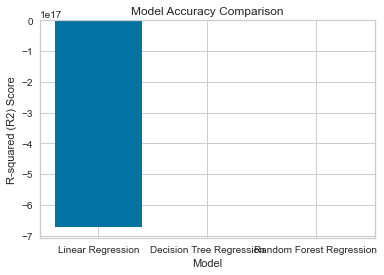

In [1511]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_linear = linear_reg_model.predict(X_test)

# Decision Tree Regression
dtree_model = DecisionTreeRegressor(random_state=42)
dtree_model.fit(X_train, y_train)
y_pred_dtree = dtree_model.predict(X_test)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

dtree_mse = mean_squared_error(y_test, y_pred_dtree)
dtree_r2 = r2_score(y_test, y_pred_dtree)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Linear Regression:")
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)

print("\nDecision Tree Regression:")
print("Mean Squared Error:", dtree_mse)
print("R-squared:", dtree_r2)

print("\nRandom Forest Regression:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)

models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
r2_scores = [linear_r2, dtree_r2, rf_r2]

# Plot the graph of model accuracy (R2 scores)
plt.bar(models, r2_scores)
plt.xlabel('Model')
plt.ylabel('R-squared (R2) Score')
plt.title('Model Accuracy Comparison')
plt.show()

Epoch 1/100
64/64 [==============================] - 2s 5ms/step - loss: 3.5443 - accuracy: 0.0015 - val_loss: 2.4439 - val_accuracy: 0.0000e+00
Epoch 2/100
64/64 [==============================] - 0s 5ms/step - loss: 2.6576 - accuracy: 9.8571e-04 - val_loss: 2.4626 - val_accuracy: 0.0000e+00
Epoch 3/100
64/64 [==============================] - 0s 5ms/step - loss: 2.6613 - accuracy: 9.8571e-04 - val_loss: 2.3148 - val_accuracy: 0.0000e+00
Epoch 4/100
64/64 [==============================] - 0s 5ms/step - loss: 2.6357 - accuracy: 9.8571e-04 - val_loss: 2.2956 - val_accuracy: 0.0000e+00
Epoch 5/100
64/64 [==============================] - 0s 4ms/step - loss: 2.6045 - accuracy: 9.8571e-04 - val_loss: 2.4731 - val_accuracy: 0.0000e+00
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 2.5570 - accuracy: 9.8571e-04 - val_loss: 2.2978 - val_accuracy: 0.0000e+00
Epoch 7/100
64/64 [==============================] - 0s 4ms/step - loss: 2.5495 - accuracy: 9.8571e-04 - val_l

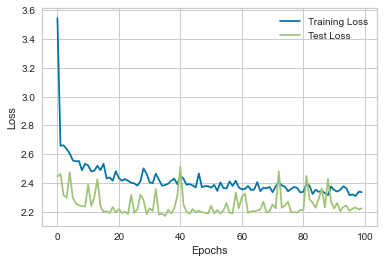

In [1512]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Hyperparameter tuning
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Plot Training and Test Loss vs. Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1513]:
from pycaret.regression import *

# Assuming train_df_merged is your DataFrame and X_train, X_test, y_train, y_test are prepared

# Combine X_train and y_train into a single DataFrame for PyCaret setup
train_data = pd.concat([X_train, y_train], axis=1)

# Setup PyCaret environment
reg_setup = setup(data=train_data, target='Yield', train_size=0.8, verbose=False)

# Compare and train multiple regression models
best_model = compare_models(fold=5, sort='R2', n_select=3)

# Evaluate the best model
evaluate_model(best_model)

# If you want to tune hyperparameters for the best model
tuned_model = tune_model(best_model)

# If you want to see the feature importance for the best model
plot_model(best_model, plot='feature')

# If you want to make predictions on new data using the best model
predictions = predict_model(best_model, data=X_test)



Processing:   0%|          | 0/83 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

ValueError: Estimator [] does not have the required fit() method.